## Data cleaning, feature engineering, and modeling

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/voter-survey-december16.csv')

In [3]:
# religion composite variables col names 


imiss_col_list = ['CIVIC_PARTICIPATION_2016',
                  'pew_churatd_2016',
                  'pew_religimp_2016',
                  'pew_bornagain_2016',
                  'pew_prayer_2016',
                  'religpew_2016'
                ]
len(imiss_col_list)

6

In [4]:
# target column list  
target_col_list = ['presvote16post_2016']
df_target = df[target_col_list]

In [5]:
df_issue = df[imiss_col_list].fillna(0)


In [6]:
df_issue = df_issue.astype(str)
df_issue = df_issue.join(df_target)

In [7]:
df_dummies = pd.get_dummies(df_issue)

In [8]:
df_dummies.corr()['presvote16post_2016'].abs().sort_values(ascending=False)

presvote16post_2016             1.000000
pew_bornagain_2016_1.0          0.124769
pew_bornagain_2016_2.0          0.124197
pew_religimp_2016_1             0.117217
pew_religimp_2016_4             0.110876
pew_prayer_2016_1.0             0.110281
pew_prayer_2016_7.0             0.102675
pew_churatd_2016_6.0            0.101641
religpew_2016_9.0               0.091458
pew_churatd_2016_2.0            0.086730
religpew_2016_3.0               0.080701
religpew_2016_1.0               0.074097
pew_churatd_2016_1.0            0.066156
religpew_2016_10.0              0.059587
pew_religimp_2016_3             0.055058
religpew_2016_5.0               0.053526
pew_prayer_2016_6.0             0.047372
religpew_2016_11.0              0.043944
religpew_2016_2.0               0.042726
pew_churatd_2016_5.0            0.025002
pew_prayer_2016_8.0             0.023639
religpew_2016_8.0               0.019356
religpew_2016_7.0               0.018785
CIVIC_PARTICIPATION_2016_0.0    0.018690
religpew_2016_6.

In [9]:
df_dummies.shape

(8000, 45)

In [10]:
df_predictors = df_dummies.drop('presvote16post_2016', axis=1)

In [11]:
df_predictors.head()

,CIVIC_PARTICIPATION_2016_0.0,CIVIC_PARTICIPATION_2016_1.0,CIVIC_PARTICIPATION_2016_2.0,CIVIC_PARTICIPATION_2016_3.0,CIVIC_PARTICIPATION_2016_4.0,CIVIC_PARTICIPATION_2016_5.0,CIVIC_PARTICIPATION_2016_6.0,pew_churatd_2016_0.0,pew_churatd_2016_1.0,pew_churatd_2016_2.0,...,religpew_2016_11.0,religpew_2016_12.0,religpew_2016_2.0,religpew_2016_3.0,religpew_2016_4.0,religpew_2016_5.0,religpew_2016_6.0,religpew_2016_7.0,religpew_2016_8.0,religpew_2016_9.0
0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


## K means clustering

In [12]:
X = df_predictors

In [13]:
from sklearn.cluster import KMeans
from sklearn import metrics 
from sklearn.model_selection import train_test_split

In [68]:
k_means = KMeans(n_clusters=4)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [69]:
labels = k_means.labels_

In [70]:
y_pred = k_means.predict(X)

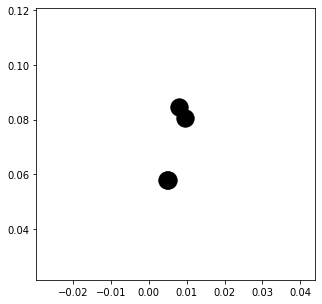

In [71]:
plt.figure(figsize=(5,5))
cl_centers = k_means.cluster_centers_
plt.scatter(cl_centers[:, 0], cl_centers[:, 1], c='black', s=300)

In [64]:
metrics.silhouette_score(X, labels, metric='euclidean')

0.15636766923389564

In [65]:
metrics.calinski_harabasz_score(X, labels)

1331.132949584017

In [20]:
df_target = df[target_col_list]
print(df_target.shape)
df_target_arr = np.ravel(df_target)

(8000, 1)


In [21]:
df_target_arr
y_pred.shape

(8000,)

In [22]:
dataset = pd.DataFrame({ 'y_pred': y_pred}, 
                        columns=[ 'y_pred']
                        )

In [23]:
dataset.head()

,y_pred
0,0
1,1
2,0
3,0
4,1


In [24]:
target_pred_df = df_predictors.join(df_target).join(dataset)
target_pred_df.head(10)

,CIVIC_PARTICIPATION_2016_0.0,CIVIC_PARTICIPATION_2016_1.0,CIVIC_PARTICIPATION_2016_2.0,CIVIC_PARTICIPATION_2016_3.0,CIVIC_PARTICIPATION_2016_4.0,CIVIC_PARTICIPATION_2016_5.0,CIVIC_PARTICIPATION_2016_6.0,pew_churatd_2016_0.0,pew_churatd_2016_1.0,pew_churatd_2016_2.0,...,religpew_2016_2.0,religpew_2016_3.0,religpew_2016_4.0,religpew_2016_5.0,religpew_2016_6.0,religpew_2016_7.0,religpew_2016_8.0,religpew_2016_9.0,presvote16post_2016,y_pred
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1.0,0
1,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,2.0,1
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1.0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,3.0,0
4,0,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,2.0,1
5,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1.0,0
6,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1.0,1
7,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,2.0,0
8,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1.0,0
9,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1.0,0


In [66]:
count = 0
for row in target_pred_df.itertuples():
    if (row.presvote16post_2016 == 2) and (row.y_pred == 0):
        count +=1
print(count)


1561


## Logistic regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [27]:
X = df_predictors
y = df_target
X.head()

,CIVIC_PARTICIPATION_2016_0.0,CIVIC_PARTICIPATION_2016_1.0,CIVIC_PARTICIPATION_2016_2.0,CIVIC_PARTICIPATION_2016_3.0,CIVIC_PARTICIPATION_2016_4.0,CIVIC_PARTICIPATION_2016_5.0,CIVIC_PARTICIPATION_2016_6.0,pew_churatd_2016_0.0,pew_churatd_2016_1.0,pew_churatd_2016_2.0,...,religpew_2016_11.0,religpew_2016_12.0,religpew_2016_2.0,religpew_2016_3.0,religpew_2016_4.0,religpew_2016_5.0,religpew_2016_6.0,religpew_2016_7.0,religpew_2016_8.0,religpew_2016_9.0
0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [28]:
X.isna().sum().any()
y.isna().sum()

presvote16post_2016    394
dtype: int64

In [29]:
y = y.fillna(0)
y = np.ravel(y)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.2, 
                                                    stratify=y)

In [31]:
lr = LogisticRegression(C=2, penalty='l2', 
                        solver='lbfgs', 
                        multi_class='auto', 
                        max_iter=1000)
lr.fit(X_train, y_train)
y_pred_test = lr.predict(X_test)

In [32]:
df_target.columns

Index(['presvote16post_2016'], dtype='object')

In [33]:
cm = confusion_matrix(y_test, y_pred_test)
conf_matrix = pd.DataFrame(cm, index=['None','Clinton','Trump','Johnson','Stein','McMullin','Other','Did not vote'], 
                           columns=['Pred None','Pred Clinton','Pred Trump','Pred Johnson','Pred Stein','Pred McMullin','Pred Other','Pred Did Not Vote'])


conf_matrix

,Pred None,Pred Clinton,Pred Trump,Pred Johnson,Pred Stein,Pred McMullin,Pred Other,Pred Did Not Vote
None,0,32,47,0,0,0,0,0
Clinton,0,404,305,0,0,0,0,0
Trump,0,212,484,0,0,0,0,0
Johnson,0,21,25,0,0,0,0,0
Stein,0,17,5,0,0,0,0,0
McMullin,0,0,5,0,0,0,0,0
Other,0,14,22,0,0,0,0,0
Did not vote,0,2,5,0,0,0,0,0


In [34]:
# correct Clinton
correct = cm[1][1]
total = sum(cm[1])
pred_correct = correct/total
pred_correct

0.5698166431593794

In [35]:
# correct Trump
correct = cm[2][2]
total = sum(cm[2])
pred_correct = correct/total
pred_correct

0.6954022988505747

In [36]:
len(lr.coef_[1])

44

In [67]:
coef_dict = dict(zip(X.columns, lr.coef_))
coef_dict

{'CIVIC_PARTICIPATION_2016_0.0': array([-0.33010624, -0.18743568,  0.11063539, -0.25555235, -0.41793052,
         0.18848342,  0.89647006, -0.18498262, -0.59156265, -0.66877742,
        -0.09067526, -0.1145303 ,  0.27349647,  0.36037441,  1.02122144,
         0.04392665,  0.01701008,  0.16052895, -0.2169016 ,  0.74432188,
        -0.19518568, -0.54457212,  0.66295802, -0.10204485,  0.20793895,
         0.0946678 , -0.00935901, -0.47937586, -0.02479795, -0.08300816,
        -0.26241486, -0.46875211,  0.08670494, -0.2382971 ,  0.09104182,
        -0.42347507,  0.11020984,  0.0121663 , -0.69252863,  0.46624027,
         1.33020661, -0.51163675,  0.70641451, -0.46373056]),
 'CIVIC_PARTICIPATION_2016_1.0': array([-0.08041317, -0.00612245,  0.09356531,  0.13642211,  0.07781282,
        -0.0911656 , -0.16728524,  0.80181845, -0.40842121, -0.31506129,
        -0.1549199 , -0.10472403,  0.10416603,  0.16019172, -0.12023599,
         0.02195438, -0.22105905,  0.18972515, -0.02780669,  0.29371468

## Feature importance

In [38]:
from sklearn.feature_selection import RFE
predictors = X_train
selector = RFE(lr, n_features_to_select=1)
selector = selector.fit(predictors, y_train)

In [39]:
len(X_train.columns)

44

In [40]:
order = selector.ranking_
len(order)
order

array([10, 25, 44, 32, 39, 36, 15, 28, 30, 31, 38, 37, 17,  5,  3,  8, 42,
       20, 27, 19, 35, 23, 33, 24, 40, 18, 13, 26, 41, 34,  9, 29, 21, 11,
       43, 12, 22,  1, 16,  6,  4,  2, 14,  7])

In [41]:
df_predictors.columns

Index(['CIVIC_PARTICIPATION_2016_0.0', 'CIVIC_PARTICIPATION_2016_1.0',
       'CIVIC_PARTICIPATION_2016_2.0', 'CIVIC_PARTICIPATION_2016_3.0',
       'CIVIC_PARTICIPATION_2016_4.0', 'CIVIC_PARTICIPATION_2016_5.0',
       'CIVIC_PARTICIPATION_2016_6.0', 'pew_churatd_2016_0.0',
       'pew_churatd_2016_1.0', 'pew_churatd_2016_2.0', 'pew_churatd_2016_3.0',
       'pew_churatd_2016_4.0', 'pew_churatd_2016_5.0', 'pew_churatd_2016_6.0',
       'pew_churatd_2016_7.0', 'pew_religimp_2016_1', 'pew_religimp_2016_2',
       'pew_religimp_2016_3', 'pew_religimp_2016_4', 'pew_bornagain_2016_0.0',
       'pew_bornagain_2016_1.0', 'pew_bornagain_2016_2.0',
       'pew_prayer_2016_0.0', 'pew_prayer_2016_1.0', 'pew_prayer_2016_2.0',
       'pew_prayer_2016_3.0', 'pew_prayer_2016_4.0', 'pew_prayer_2016_5.0',
       'pew_prayer_2016_6.0', 'pew_prayer_2016_7.0', 'pew_prayer_2016_8.0',
       'religpew_2016_0.0', 'religpew_2016_1.0', 'religpew_2016_10.0',
       'religpew_2016_11.0', 'religpew_2016_12.0', '

In [42]:
for i in df_predictors.index:
    rank = np.array(order)
    feat = np.array(df_predictors.columns)
    rank_feat = pd.DataFrame(rank,feat, columns=['rank'])

In [72]:
rank_feat.sort_values(by='rank').head(20)

,rank
religpew_2016_3.0,1
religpew_2016_7.0,2
pew_churatd_2016_7.0,3
religpew_2016_6.0,4
pew_churatd_2016_6.0,5
religpew_2016_5.0,6
religpew_2016_9.0,7
pew_religimp_2016_1,8
pew_prayer_2016_8.0,9
CIVIC_PARTICIPATION_2016_0.0,10


## Cross-validation

In [44]:
from sklearn.model_selection import cross_val_score

In [45]:
X.isna().sum().any()

False

In [46]:
y = np.ravel(y)
y.shape

(8000,)

In [47]:
scores = cross_val_score(lr, X, y, cv=5)

In [48]:
scores

array([0.60137243, 0.55867665, 0.558125  , 0.55284553, 0.53696742])

## Random forest

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [50]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_test = rf.predict(X_test)
score = accuracy_score(y_test, y_pred_test)

/Users/alyssaliguori/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [51]:
score

0.5175

In [52]:
scores = cross_val_score(rf, X, y, cv=5)

In [53]:
scores

array([0.55708047, 0.51747815, 0.52125   , 0.51469669, 0.49937343])

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
knn = KNeighborsClassifier()
scores = cross_val_score(knn, X, y, cv=5)
scores

array([0.52900811, 0.51123596, 0.526875  , 0.51657286, 0.52694236])

In [56]:
from sklearn.svm import SVC

In [57]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_test = svm.predict(X_test)
score = accuracy_score(y_test, y_pred_test)
score

0.5575

In [58]:
scores = cross_val_score(svm, X, y, cv=5)
scores

array([0.60137243, 0.54182272, 0.553125  , 0.55222014, 0.53634085])

In [59]:
svm = SVC(kernel='linear', class_weight='balanced')
svm.fit(X_train, y_train)
y_pred_test = svm.predict(X_test)
score = accuracy_score(y_test, y_pred_test)
score

0.181875